In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

# Domain decomposition method (DDM)
## Test1 of L-shape domain problem in IJNME

<br />
<img align="left" src="img/Test1.png" alt="Drawing" style="width: 600px;"/>
<br /><br /><br />

### Step1. Setup BEM subdomains

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:8(Total) 8(Edge) 0(Trace)
[Mesh] Number of Nodes:24(Total) 24(Edge) 0(Trace) 0(Source)


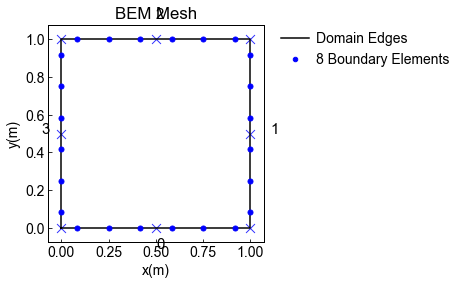

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 100)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:10(Total) 10(Edge) 0(Trace)
[Mesh] Number of Nodes:30(Total) 30(Edge) 0(Trace) 0(Source)


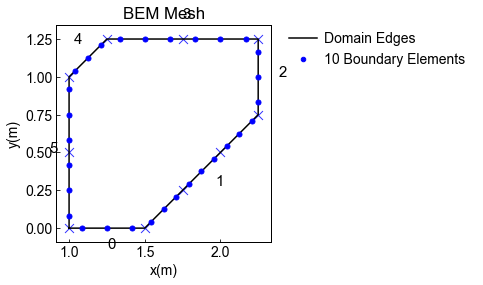

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(1, 10)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:8(Total) 8(Edge) 0(Trace)
[Mesh] Number of Nodes:24(Total) 24(Edge) 0(Trace) 0(Source)


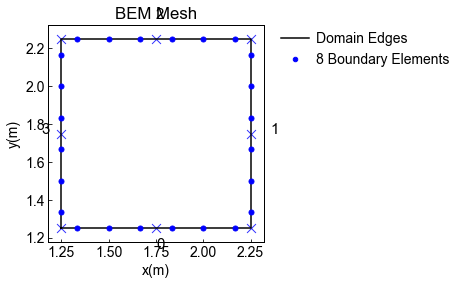

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(2, 100)]


In [11]:
#####Subdomain1########
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1/2.0

BEM_Case1.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case1.plot_Mesh()
#2.Set Boundary condition
bc0=[(3,100)]
bc1=[(1,0)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

#####Subdomain2########
BEM_Case2=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(1.0, 0.0), (1.5, 0.0), (2.25, 0.75),(2.25,1.25),(1.25,1.25),(1.0, 1.0)] #Anti-clock wise for internal domain

BEM_Case2.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case2.plot_Mesh()

#2.Set Boundary condition
bc0=[(1,10)]
bc1=[(5,0),(3,0)]
BEM_Case2.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

#####Subdomain3########
BEM_Case3=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(1.25, 1.25), (2.25, 1.25), (2.25, 2.25), (1.25, 2.25)] #Anti-clock wise for internal domain

BEM_Case3.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case3.plot_Mesh()

#2.Set Boundary condition
bc0=[(2,100)]
bc1=[(0,0)]
BEM_Case3.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()


BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled

### Step2. Setup iterative coupling solver

In [12]:
BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled

#Intersection 1
#Domain 0 <-> Domain 1
#BD 1 <-> BD 3
DomainID,BoundaryID=0,1
DomainID_connect,BoundaryID_connect=1,5
Intersect1=[DomainID,DomainID_connect,BoundaryID,BoundaryID_connect]

#Intersection 2
#Domain 1 <-> Domain 2
#BD 3 <-> BD 0
DomainID,BoundaryID=1,3
DomainID_connect,BoundaryID_connect=2,0
Intersect2=[DomainID,DomainID_connect,BoundaryID,BoundaryID_connect]

Intersections=[Intersect1,Intersect2]

### Step3. Parallel Robin-Robin Algorithm

[Solution] #DOFs= 12
[Solution] #DOFs= 21
[Solution] #DOFs= 12
1	1.0		alpha:	0.5
2	0.499105252954328		alpha:	0.5
3	0.42568721485699496		alpha:	0.9983898652389086
4	0.1499375894666125		alpha:	1.0013567935899388
5	0.10788871424521781		alpha:	1.8307731376731293
6	0.03555666585893057		alpha:	1.8293147918717494
7	0.01681015006987265		alpha:	0.6869603355371596
8	0.0006800250892839261		alpha:	0.6678385106252233
9	0.0001375027237657056		alpha:	0.6890336467941791
10	0.00026614768803328735		alpha:	2.006603930515947
11	2.6680653037220882e-05		alpha:	2.0162624504611095
12	1.935774062913483e-05		alpha:	3.0209038487721984
13	7.84309432501857e-06		alpha:	1.403628333414263
Converged at 13 Steps! TOL= 1e-05
Dirichelt [52.1542844  54.82005538 57.48716966]
Robin [105.47767086 100.00220859  94.52095161]


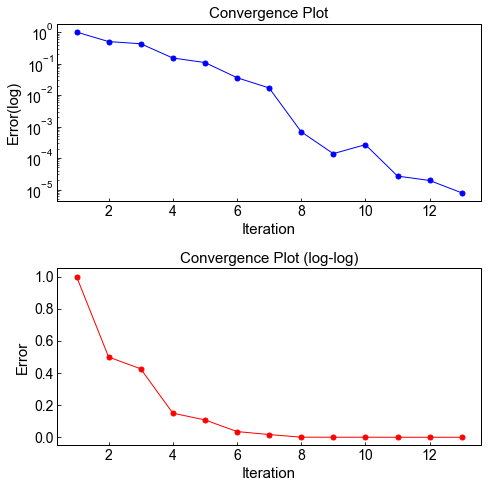

In [20]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=Intersections,plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-RR",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Neumann-Neumann Algorithm

[Solution] #DOFs= 24
[Solution] #DOFs= 30
[Solution] #DOFs= 24
1	1.0		alpha:	0.5
2	0.06308314424147957		alpha:	0.5
3	0.11599818027805286		alpha:	1.4534303552874022
4	0.009437078044442031		alpha:	1.5618241273695963
5	0.00111746155044924		alpha:	1.5719040278332088
6	0.0005425263217333672		alpha:	0.6005557969309667
7	0.0001915770546232166		alpha:	0.5660234740292237
8	0.000259201602348763		alpha:	0.6600374363155979
9	0.0012342410913538323		alpha:	3.7281691230879033
10	0.0006587885496168603		alpha:	4.829289632110156
11	0.00021529224380437573		alpha:	0.8859074642421992
12	9.491204864787464e-05		alpha:	0.49567817633043804
13	1.1424639592780374e-05		alpha:	0.49977753337710984
14	8.654090707712214e-05		alpha:	4.268323338023911
15	5.085415606638766e-05		alpha:	5.500004827459882
16	1.7393305222245642e-05		alpha:	5.562142779370758
17	7.483725761178619e-06		alpha:	2.104253931630174
Converged at 17 Steps! TOL= 1e-05
Dirichelt [51.74193085 52.59064392 53.97696033 55.55548392 56.95422604 57.64942206]


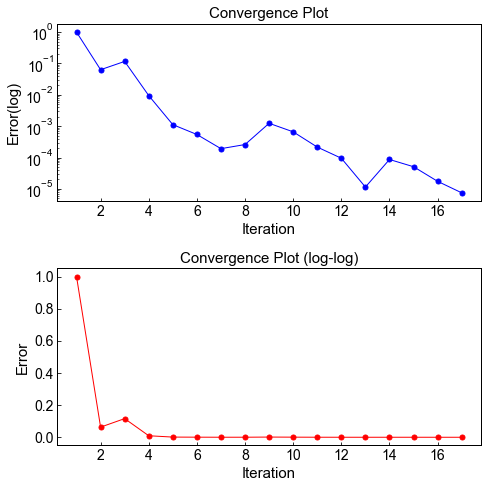

In [13]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=Intersections,plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-NN",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Dirichlet-Dirichlet Algorithm

[Solution] #DOFs= 12
[Solution] #DOFs= 21
[Solution] #DOFs= 12
1	1.0		alpha:	0.5
2	0.2175789676920737		alpha:	0.5
3	0.16726605690936244		alpha:	0.16576735816666563
4	0.0042965202390925225		alpha:	0.16569780719530747
5	0.0018494953502707673		alpha:	0.09433957430670448
6	1.2356273364273767e-07		alpha:	0.09434603626156529
Converged at 6 Steps! TOL= 1e-05
Dirichelt [52.15428935 54.82004354 57.4871745 ]
Neumann [53.32334124 45.18228437 37.03373614]


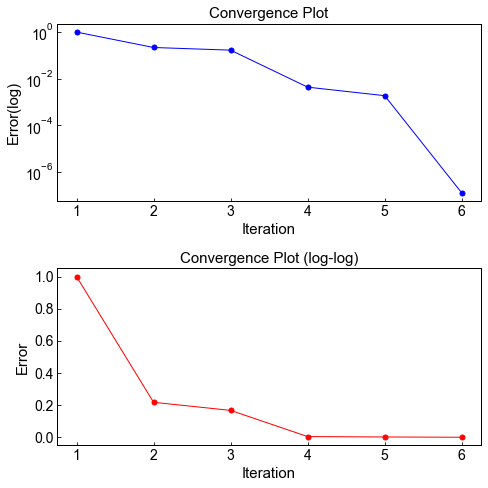

In [16]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=Intersections,plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-DD",TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Sequential Dirichlet-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 26
Total Number of Subdomains: 3


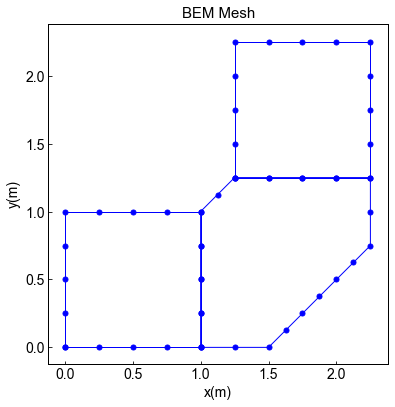

[Warnning] This method is not applicable for new input format


In [16]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="S-DN",TOL=1e-5,alpha=0.5,opt=1) #p-dn

### Step4. Solution Visulization & Verification

[Visulization] Plotting Solution


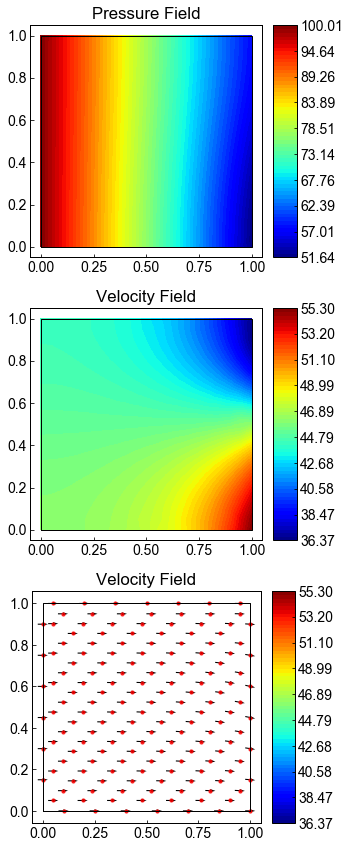

[Visulization] Plotting Solution


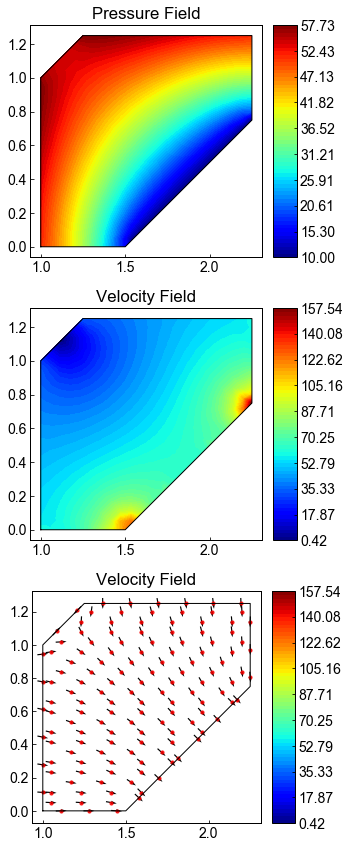

[Visulization] Plotting Solution


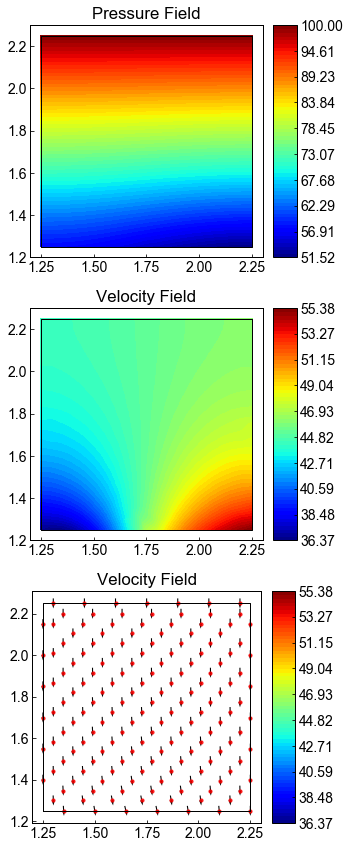

In [14]:
#Pressure and velocity contour results
PUV1=BEM_Case1.PostProcess.plot_Solution()
PUV2=BEM_Case2.PostProcess.plot_Solution()
PUV2=BEM_Case3.PostProcess.plot_Solution()

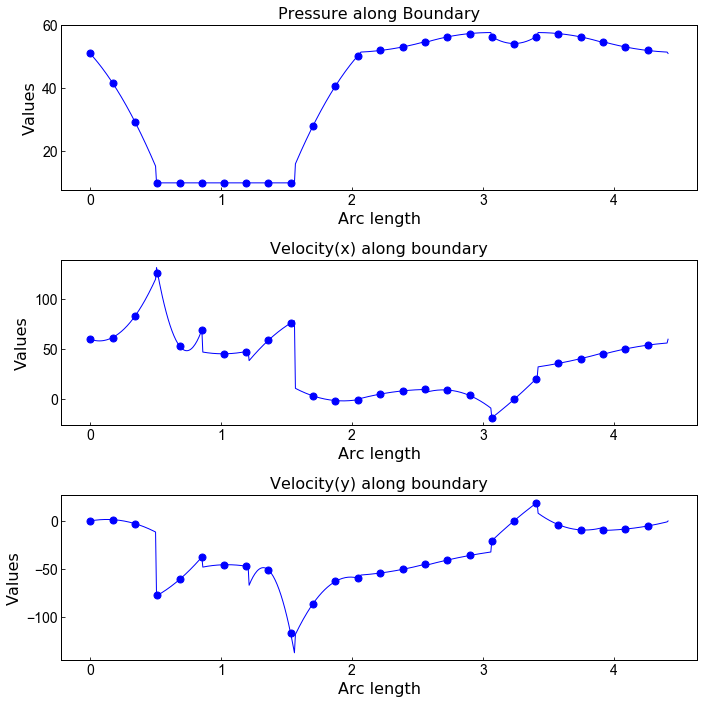

In [15]:
#Pressure and velocity along the boundary
P=BEM_Case2.PostProcess.plot_SolutionBD()